In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

#<img src="pixels.jpg" width="500">

In [2]:
#ABCD ray trace function
def ABCD_trace(a,zf, zf_type):
    #a: starting vector a=np.array([[height],[angle]])
    #zf: free space and lens focal lengths
    #zf_type: type of optical element ('z' for free space, 'f' for lens)
    #return matrix of y, z

    #check to make sure the passed arrays match in length
    if np.size(zf) != len(zf_type):
        print("zf and zf_type arrays do not match")
        return None

    trace=np.array([[a[0,0]], [0]])
    for ind in range(len(zf_type)):

        if zf_type[ind] == 'z':
            #free space propagation
            M1 = np.array([[1.0, zf[ind]], [0.0, 1.0]])
            a=M1@a
            #add new point to trace matrix
            y=a[0,0]
            z=trace[1, -1]+zf[ind]
            new_point = np.array([[y], 
                                  [z]])
            # Append column-wise
            trace = np.hstack((trace, new_point))
            
        elif zf_type[ind] == 'f':
            #free space propagation
            M1 = np.array([[1.0, 0.0], [-1/zf[ind], 1.0]])
            a=M1@a
            #Don't append to the trace
            #No ray travel

        else:
            print("Invalid zf_type")
            return None
    return trace

# Cameras (Section)
Start by looking a simple camera.  This is the Cannon PowerShot S200. 

<img src="PowerShot_S200.jpg" width="300">

It has a zoom lens with an adjustable focal length $5.2mm$ < $f$ < $26.0 mm$. It has an image sensor called a Charge Coupled Device (CCD). The CCD has 3648 × 2736 pixels (which is about 10.1 million pixels).  With a sensor size of $7.44 × 5.58 mm$.

Here is a picture of a CCD.

<img src="ccd.jpg" width="300">

Each pixel is actually 3 pixels. Each pixel of an image has a red, green, and blue pixel.  The colors are typically created using color filters.

<img src="pixels.jpg" width="500">

The pixels are not standard photodiodes.  A PIN photodiode has a clear p-type / intrinsic / n-type layer structure and is typically reverse-biased so that photo-generated charge is immediately swept out as a current.

A CCD pixel, in contrast:

Uses a MOS capacitor / potential well in silicon to collect and store charge.

Photo-generated electrons accumulate over the exposure time rather than being continuously read out.

The charge is later shifted across the chip during readout.

<div style="border:4px solid red">

**HW1:** A camera is modeled as a single ideal lens.  It has a focal length of $f=26mm$ and a CCD with dimensions of $7.44 × 5.58 mm$.  The camera is used to take a picture of a tree that is located $5m$ in front of the camera lens. What is the distance between the lens and the CCD?  Call the variable hw5_1.

In [3]:
#HW 1 Code

f = 0.026
ccd_x = 0.00744
ccd_y = 0.00558
object_distance = 5

image_distance = 1 / (1/f - 1/object_distance)

hw5_1 = image_distance

print(f"hw5_1 = {hw5_1:.4f} m")

hw5_1 = 0.0261 m


<div style="border:4px solid red">

**HW2:** A camera is modeled as a single ideal lens.  It has a focal length of $f=26mm$ and a CCD with dimensions of $7.44 × 5.58 mm$.  The camera is used to take a picture of a tree that is located $5m$ in front of the camera lens. The tree is 6m height.  What is the image height in meters?  Call the variable hw5_2.

In [18]:
#HW 2 Code

object_height = 6

magnification = -image_distance / object_distance

image_height = magnification * object_height

hw5_2 = image_height

print(f"Magnification: {magnification:.4f}")
print(f"hw5_2 = {hw5_2:.2f} m")


Magnification: -0.0052
hw5_2 = -0.03 m


<div style="border:4px solid red">

**HW3:** A camera is modeled as a single ideal lens.  It has a focal length of $f=26mm$ and a CCD with dimensions of $7.44 × 5.58 mm$.  The camera is used to take a picture of a tree that is located $5m$ in front of the camera lens. What is the magnification?  Call the variable hw5_3.

In [19]:
#HW3 Code

hw5_3 = magnification

print(f"hw5_3 = {hw5_3:.4f}")

hw5_3 = -0.0052


<div style="border:4px solid red">

**HW4:** A camera is modeled as a single ideal lens.  It has a focal length of $f=26mm$ and a CCD with dimensions of $7.44 × 5.58 mm$.  The camera is used to take a picture of a mountain that is located $5000m$ in front of the camera lens. What is the magnification?  Call the variable hw5_4.

In [24]:
#HW4 Code

object_distance = 5000
image_distance = 1/(1/f - 1/object_distance)
magnification = -image_distance / object_distance
hw5_4 = magnification
print(f"hw5_4 = {hw5_4:.10f}")

hw5_4 = -0.0000013600


Magnification is not a good specification to compare cameras.  The magnification depends on the distance away from the camera rather than the focal length of the camera.  A better specifcation is the field of view (FOV).  In this case we assume that the object is a large distance away from the camera ($S_o>>f$).  We treat the incident object as a set of parallel rays.  Here is a plot of a set of parallel rays.  Notice that all of the rays focus to a point at a distance of $f$ from the lens.  The height of the focal point changes with indident angle of the rays.

A lens converts incident angle into poition.  So, putting a CCD at the focus produces an image where each CCD position (i.e. pixel) corresponds to a specific a specific angle in object space. 

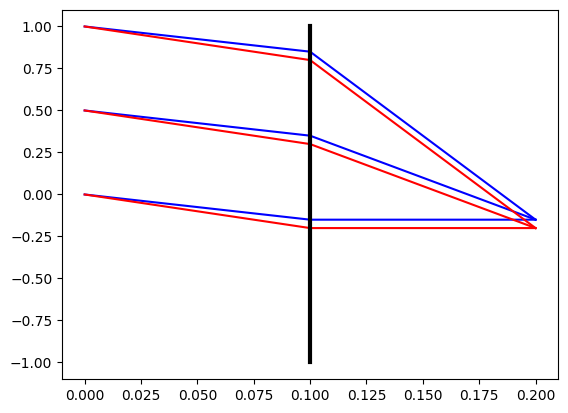

In [7]:
#plot a set of parallel rays through an optical system
#use a lens with a focal length of 100 mm

zf=np.array([.1, .1, .1])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']

th1=-1.5

a=np.array([[1.0], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]

a=np.array([[.5], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]

a=np.array([[0], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z3=trace[1,:]
y3=trace[0,:]

th2=-2

a=np.array([[1.0], [th2]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z4=trace[1,:]
y4=trace[0,:]

a=np.array([[.5], [th2]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z5=trace[1,:]
y5=trace[0,:]

a=np.array([[0], [th2]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z6=trace[1,:]
y6=trace[0,:]

x_lens=np.array([.1, .1])
y_lens=np.array([-1, 1])

plt.plot(z1, y1, 'b')
plt.plot(z2, y2, 'b')
plt.plot(z3, y3, 'b')
plt.plot(z4, y4, 'r')
plt.plot(z5, y5, 'r')
plt.plot(z6, y6, 'r')
plt.plot(x_lens, y_lens, 'k', linewidth=3)
plt.show()

The field of view (FOV) is the angular extent of space over which an optical system can collect radiation and form an image on a detector. FOV is fundamentally an angular quantity, determined by system geometry rather than image brightness or exposure. Here is the process.

1. Parallel rays come to a focus in the plane of the focal length of the lens.
2. A ray that travels through the focus comes out parallel.  Use this to determine the height of the rays on the CCD.

Let:
- $f$ = camera focal length  
- $H$ = position on the image plane  
- $\theta$ = incident angle

<img src="FOV.jpg" width="500">


We use the paraxial approximation. (A camera needs to obey the paraxial approximation otherwise it does not produce a clear image. No real lenses obey the paraxial approximation.  The lens design of a camera is to use multiple lenses to make the system behave like a single paraxial lens.)

$$
\boxed{\theta = \frac{H}{f}}
$$

There is a cone of angles for each pixel.  The total range of angles (i.e FOV) depends on the focal length of the camera and the size of the CCD.

<div style="border:4px solid red">

**HW5:** The Cannon PowerShot S200 has a focal length of $f=26mm$ and the CCD has 3648 × 2736 pixels (which is about 10.1 million pixels) with a sensor size of $7.44 × 5.58 mm$.  What is the horizontal (long dimension) field of view (FOV) for the camera? Use variable hw5_5. 

In [25]:
#CODE for HW5

fov_x = ccd_x/ f
fov_y = ccd_y/ f

print(f"Field of View (X): {fov_x:.4f} radians")
print(f"Field of View (Y): {fov_y:.4f} radians")

hw5_5 = fov_x


Field of View (X): 1.0941 radians
Field of View (Y): 0.8206 radians


<div style="border:4px solid red">

**HW6:** The Cannon PowerShot S200 has a focal length of $f=26mm$ and the CCD has 3648 × 2736 pixels (which is about 10.1 million pixels) with a sensor size of $7.44 × 5.58 mm$.  The camera is used to take a picture of a tree that is located $5m$ in front of the camera lens.  What is the size of each pixel of the picture? Use variable hw5_6. 

In [31]:
#CODE for HW6

ccd_pixels_x = 3648
ccd_pixels_y = 2736

pixel_size_x = ccd_x / ccd_pixels_x
pixel_size_y = ccd_y / ccd_pixels_y

pixel_fov = pixel_size_y / f

image_distance = 5.0

hw5_6 = pixel_fov * image_distance

print(f"Pixel Size: {pixel_size_x:.10f} m")
print(f"pixel fov: {pixel_fov:.10f} radians")
print(f"hw5_6= {hw5_6:4f} m")

Pixel Size: 0.0000020395 m
pixel fov: 0.0002999226 radians
hw5_6= 0.001500 m


<div style="border:4px solid red">

**HW7:** You are designing a camera that is used to read the license plate of vehicles that run red lights.  The distance between the camera and the license plate is 10m.  For your information the letters on a license plate are 60mm tall.  To be able to distinguish between the letters and number (i.e. B and 8) you need at least 20 pixels across.  This means that your camera needs to have an image pixel size of 60/20=3mm. The total field of view of the entire image needs to be able to image the entire road.  So the entire image size needs to be 3.4 m.  Your design needs to use a commercially available CCD sensor array.  The sensor array that you need to use is called a 1/3.6” CCD, which has a size of 4mm X 3mm. To keep the cost down you should use the fewest number of CCD pixel elements as possible.  The camera is specified by the focal length and the CCD pixels.  (The diameter of the camera system also matter.  But we are ignoring the lens size because that just dictates the amount of collected light.  This will be covered later.)

Specify the following parameters in the specified variables.
hw5_7a: focal length
hw5_7b: pixel width  (The pixels are square.)


In [39]:
#CODE for HW7

pixel_image_size = 0.003
image_size_x = 3.4
object_distance = 10

ccd_size_x = 0.004
num_pixels_x = image_size_x / pixel_image_size

pixel_size = ccd_size_x / num_pixels_x

print(f"Number of Pixels (X): {num_pixels_x:.0f} pixels")
print(f"Pixel size (X): {pixel_size*1000000:.10f} µm")

fov_pixel = pixel_image_size / object_distance
fov_image = image_size_x / object_distance


# Just a sanity check, these two quantities should be the same.
f_pixel = pixel_size / fov_pixel
f_image = ccd_size_x / fov_image

print(f"Focal Length (Pixel FOV): {f_pixel:.4f} m")
print(f"Focal Length (Image FOV): {f_image:.4f} m")

hw5_7a = f_pixel
hw5_7b = pixel_size

print(f"hw5_7a = {hw5_7a:.4f} m")
print(f"hw5_7b = {hw5_7b*1000000:.10f} µm")

Number of Pixels (X): 1133 pixels
Pixel size (X): 3.5294117647 µm
Focal Length (Pixel FOV): 0.0118 m
Focal Length (Image FOV): 0.0118 m
hw5_7a = 0.0118 m
hw5_7b = 3.5294117647 µm


# Mars Reconnaissance Orbiter (MRO)

The Mars Reconnaissance Orbiter (MRO) is a NASA spacecraft launched to study Mars in unprecedented detail from orbit and to support surface missions by relaying data back to Earth.

## Mission Overview
- **Launch date:** 12 August 2005  
- **Mars arrival:** 10 March 2006  
- **Mission status:** Active (extended mission)  
- **Orbit:** Near-polar, low Mars orbit (~250–320 km)

🔗 NASA Mission Page:  
https://science.nasa.gov/mission/mars-reconnaissance-orbiter/


## Primary Mission Objectives
- Study Martian geology and climate
- Search for evidence of past and present water
- Identify and certify safe landing sites
- Act as a high-bandwidth communications relay for surface missions


## HiRISE (High Resolution Imaging Science Experiment)
- Optical system
  - Focal length: 12 m
  - Primary mirror diameter: 0.5 m
- Total CCDs: 14
  -The CCDs are arranged side-by-side to form a very wide imaging swath
    - 10 red-channel CCDs
    - 2 blue-green CCDs
    - 2 near-infrared CCDs
  - HiRISE CCD size (per CCD)
    - Pixel dimensions: 2048 × 128 pixels
    - Pixel size: 12 µm × 12 µm
- Orbit Altitude: 300 km


<div style="border:4px solid red">

**HW8:** The MRO captures images as it flies over.  It is basically a line camera.  So, this is a 1D imaging problem.  What is the 1D FOV of the MRO HiRISE camera system?  Use variable hw5_8 

In [43]:
#Code for HW8

# Per the actual specs found online, the widest swath of CCDs is the red CCDs, which are laid out in a staggered pattern with 48 pixels overlapping between each CCD.

total_pixels = (2048 * 10) - (48 * 9)
ccd_size = total_pixels * 12e-6  #12 microns per pixel

f = 12
mirror_size = 0.5

print(f"Total CCD Size: {ccd_size:.4f} m")

fov = ccd_size / f
print(f"Field of View: {fov:.4f} radians")

hw5_8 = fov

surface_image_size = fov * 300000
print(f"Surface Image Size at 300 km: {surface_image_size:.2f} m")

Total CCD Size: 0.2406 m
Field of View: 0.0200 radians
Surface Image Size at 300 km: 6014.40 m


<div style="border:4px solid red">

**HW9:** The MRO captures images as it flies over.  It is basically a line camera.  So, this is a 1D imaging problem.  What is the corresponding pixel width of the image? Use variable hw5_9 

In [45]:
#Code for HW9

pixel_image_width = surface_image_size / total_pixels
hw5_9 = pixel_image_width
print(f"hw5_9 = {hw5_9:.6f} m")

hw5_9 = 0.300000 m


## Pixel 9 Camera

Let's look at the Rear facing Wide Angle camera: https://store.google.com/product/pixel_9_specs?hl=en-US

Here are the specifications listed:
- 50 MP Octa PD wide camera
- ƒ/1.68 aperture
- 82° field of view
- 1/1.31" image sensor size

Use AI to get the actual sensor size:

Sensor size: 7.3 mm x 9.8 mm

50 megapixel


In [13]:
#aspect ratio is
ratio=9.8/7.3
#H x V = 50e6
#H=ratio*V
#ratio*V**2=50e6
V=np.sqrt(50e6/ratio)
H=ratio*V
V1=np.round(V,-2)
H1=np.round(H,-2)
print("CCD: ", H1, " x ", V1)

# calculate the pixel size in micrometers
pix_size=9.8e3/H1
pix_size=np.round(pix_size,2)
pix_size=pix_size*1e-6
print("Pixel size (m): ", pix_size)

CCD:  8200.0  x  6100.0
Pixel size (m):  1.2e-06


Use the FOV to get the focal length.  The equation is

$FOV = \frac{H}{f}$

where $H$ is in meters, FOV is in radians, and $f$ is in meters.

In [14]:
f=9.8e-3/(82*np.pi/180)  #focal length in meters
f=np.round(f,4)
print("Focal length (m): ", f)

Focal length (m):  0.0068


The $f/1.68$ is called the f-number.  

$\text{diameter}=\frac{\text{focal length}}{\text{f-number}}$

In [15]:
D=f/1.68
print("Aperture diameter (m): ", np.round(D,4))

Aperture diameter (m):  0.004


Plot the rays of the camera.

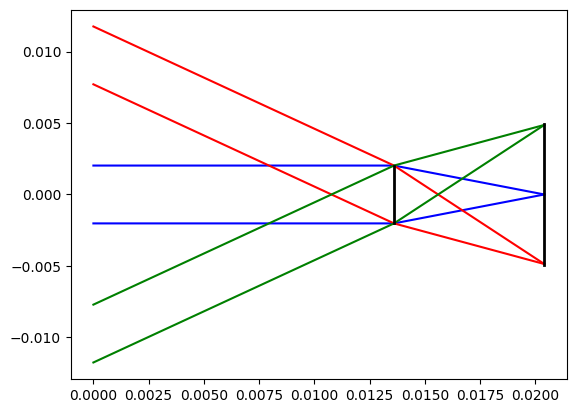

In [16]:
#plot a set of parallel rays through an optical system

zf=np.array([2*f, f, f])  #free space and lens focal lengths
zf_type=['z', 'f', 'z']

th1=0
H1=D/2
H2=-D/2
a=np.array([[H1], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]

a=np.array([[H2], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]

th1=-41*np.pi/180
H1=D/2-2*f*th1
H2=-D/2-2*f*th1
a=np.array([[H1], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z3=trace[1,:]
y3=trace[0,:]

a=np.array([[H2], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z4=trace[1,:]
y4=trace[0,:]

th1=41*np.pi/180
H1=D/2-2*f*th1
H2=-D/2-2*f*th1
a=np.array([[H1], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z5=trace[1,:]
y5=trace[0,:]

a=np.array([[H2], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z6=trace[1,:]
y6=trace[0,:]

z_lens=np.array([2*f, 2*f])
y_lens=np.array([-D/2, D/2])

z_ccd=np.array([3*f, 3*f])
y_ccd=np.array([-9.8e-3/2, 9.8e-3/2])

plt.plot(z1, y1, 'b')
plt.plot(z2, y2, 'b')
plt.plot(z3, y3, 'r')
plt.plot(z4, y4, 'r')
plt.plot(z5, y5, 'g')
plt.plot(z6, y6, 'g')
plt.plot(z_lens, y_lens, 'k', linewidth=2)
plt.plot(z_ccd, y_ccd, 'k', linewidth=2)
plt.show()



Notice that the CCD is larger than the lens diameter.